In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import timeit
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('input/Hybrid_final.csv')

In [5]:
df.head()

,u,g,r,i,z,redshift,l,b,distance,x_coord,y_coord,z_coord,u-r,class
0,21.2671,18.98994,17.6719,17.06646,16.6774,-0.000023,284.336468,61.768371,-0.099902,0.099636,0.007288,-0.000272,3.5952,2
1,18.8800,18.80000,18.3600,18.55000,18.4200,1.475710,62.957277,-37.922099,4405.359728,3791.864046,-2220.578481,313.037694,0.5200,1
2,19.5700,17.57000,16.9500,17.18000,16.9600,0.054158,143.822916,-63.736497,231.461920,214.509154,86.431852,-9.485690,2.6200,0
3,21.0900,18.99000,17.2900,17.81000,16.9000,0.160380,103.134137,-58.333575,668.936316,667.358786,30.345903,34.455367,3.8000,0
4,18.8300,18.76000,18.7200,18.55000,18.8300,1.018750,106.034273,64.941866,3409.584813,-1972.267316,-880.782956,2638.115163,0.1100,1


In [6]:
df['class'].value_counts()

1    11104
0    10845
2     8051
Name: class, dtype: int64

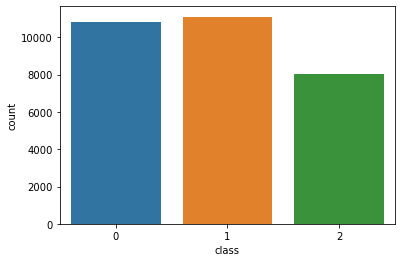

In [7]:
df['class'].head(10)
ax = sns.countplot(x='class',data=df)

In [8]:
df[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)


,class,redshift
2,2,-0.000012
1,1,1.678846
0,0,0.227121


In [9]:
X_df = df.drop(['class',"l","b","distance","x_coord","y_coord","z_coord","u-r"],axis=1).values
y_df = df['class'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.30, random_state=44, shuffle =True)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
random_forest = RandomForestClassifier(n_estimators=200)

start_time_train = timeit.default_timer()
random_forest.fit(X_train, y_train)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for RBF: ' + str(upsampling_elapsed))

Training time for RBF: 6.597374000000002


In [12]:
y_pred = random_forest.predict(X_test)

Test_acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  98.556


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3345
           1       0.99      0.98      0.98      3293
           2       0.99      1.00      1.00      2362

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



In [14]:
confusion_matrix(y_test, y_pred)

array([[3289,   44,   12],
       [  73, 3219,    1],
       [   0,    0, 2362]], dtype=int64)

# Lamost Test

In [15]:
df = pd.read_csv('Test/40879.csv')

In [16]:
df = df.dropna()

In [17]:
df.head()

,obsid,ra,dec,z,class,mag1,mag2,mag3,mag4,mag5
0,101001,332.202274,-2.056767,-0.000139,STAR,18.78,17.12,16.42,16.15,15.97
1,101002,332.471576,-2.085015,0.000119,STAR,20.91,18.10,16.66,16.05,15.67
2,101005,332.535456,-2.116436,-0.000251,STAR,18.87,17.58,17.00,16.79,16.64
3,101007,332.512558,-1.841408,-0.000169,STAR,22.89,20.09,18.57,17.35,16.72
4,101008,332.368745,-1.955771,0.000087,STAR,18.25,16.64,15.97,15.77,15.64


In [18]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

df['l'] = galactic.l.value
df['b'] = galactic.b.value


r = cosmo.comoving_distance(df['z'])
df['distance']= r.value

df.head()

,obsid,ra,dec,z,class,mag1,mag2,mag3,mag4,mag5,l,b,distance
0,101001,332.202274,-2.056767,-0.000139,STAR,18.78,17.12,16.42,16.15,15.97,58.660186,-43.716767,-0.599845
1,101002,332.471576,-2.085015,0.000119,STAR,20.91,18.10,16.66,16.05,15.67,58.851828,-43.949394,0.515369
2,101005,332.535456,-2.116436,-0.000251,STAR,18.87,17.58,17.00,16.79,16.64,58.869974,-44.019337,-1.084017
3,101007,332.512558,-1.841408,-0.000169,STAR,22.89,20.09,18.57,17.35,16.72,59.156336,-43.835957,-0.729873
4,101008,332.368745,-1.955771,0.000087,STAR,18.25,16.64,15.97,15.77,15.64,58.910001,-43.789687,0.377950


In [19]:
df= df.dropna()

In [20]:
df[['z','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)

,class,z
2,STAR,-0.000207
1,QSO,1.590710
0,GALAXY,0.143196


In [21]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df['distance'],df['ra'],df['dec'])
df['x_coord'] = cart[0]
df['y_coord'] = cart[1]
df['z_coord'] = cart[2]

df.head()

,obsid,ra,dec,z,class,mag1,mag2,mag3,mag4,mag5,l,b,distance,x_coord,y_coord,z_coord
0,101001,332.202274,-2.056767,-0.000139,STAR,18.78,17.12,16.42,16.15,15.97,58.660186,-43.716767,-0.599845,-0.530281,0.279558,0.021528
1,101002,332.471576,-2.085015,0.000119,STAR,20.91,18.10,16.66,16.05,15.67,58.851828,-43.949394,0.515369,0.456717,-0.238040,-0.018750
2,101005,332.535456,-2.116436,-0.000251,STAR,18.87,17.58,17.00,16.79,16.64,58.869974,-44.019337,-1.084017,-0.961188,0.499607,0.040033
3,101007,332.512558,-1.841408,-0.000169,STAR,22.89,20.09,18.57,17.35,16.72,59.156336,-43.835957,-0.729873,-0.647145,0.336702,0.023453
4,101008,332.368745,-1.955771,0.000087,STAR,18.25,16.64,15.97,15.77,15.64,58.910001,-43.789687,0.377950,0.334650,-0.175183,-0.012899


In [22]:
df['u-r'] = df['mag1']-df['mag4']

In [23]:
df['class'] = df['class'].astype('category').cat.codes

In [24]:
y_df = df['class']

In [25]:
columns_titles = ["mag1","mag2","mag4","mag3","mag5","z"]
data=df.reindex(columns=columns_titles)

In [26]:
X_df = data.values

In [27]:
y_pred = random_forest.predict(X_df)

In [28]:
Test_acc_random_forest = round(random_forest.score(X_df, y_df) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  99.952


In [29]:
print(classification_report(y_df, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       678
           1       0.99      0.97      0.98       112
           2       1.00      1.00      1.00      7462

    accuracy                           1.00      8252
   macro avg       1.00      0.99      0.99      8252
weighted avg       1.00      1.00      1.00      8252



In [30]:
confusion_matrix(y_df, y_pred)

array([[ 677,    1,    0],
       [   3,  109,    0],
       [   0,    0, 7462]], dtype=int64)

# SDSS Test

In [31]:
df = pd.read_csv('Test/sdss.csv')

In [32]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,94,301,6,93,4.830000e+18,GALAXY,0.399651,4286,55499,322
1,1.240000e+18,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,6,94,4.300000e+17,GALAXY,0.032125,382,51816,368
2,1.240000e+18,15.896126,1.264845,20.14134,19.28787,19.04397,18.96897,18.79573,94,301,6,274,4.460000e+17,STAR,-0.000821,396,51816,370
3,1.240000e+18,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,94,301,6,275,7.540000e+17,GALAXY,0.312048,670,52520,374
4,1.240000e+18,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,94,301,6,275,7.540000e+17,GALAXY,0.200468,670,52520,367


In [33]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

df['l'] = galactic.l.value
df['b'] = galactic.b.value


r = cosmo.comoving_distance(df['z'])
df['distance']= r.value

df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,field,specobjid,class,redshift,plate,mjd,fiberid,l,b,distance
0,1.240000e+18,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,94,301,...,93,4.830000e+18,GALAXY,0.399651,4286,55499,322,79.914118,-53.382197,10889.870466
1,1.240000e+18,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,...,94,4.300000e+17,GALAXY,0.032125,382,51816,368,79.999146,-53.417022,10737.784722
2,1.240000e+18,15.896126,1.264845,20.14134,19.28787,19.04397,18.96897,18.79573,94,301,...,274,4.460000e+17,STAR,-0.000821,396,51816,370,129.295662,-61.456728,10923.741026
3,1.240000e+18,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,94,301,...,275,7.540000e+17,GALAXY,0.312048,670,52520,374,129.523245,-61.451201,10804.270479
4,1.240000e+18,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,94,301,...,275,7.540000e+17,GALAXY,0.200468,670,52520,367,129.553380,-61.441430,10892.221138


In [34]:
df[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)

,class,redshift
2,STAR,0.000095
1,QSO,1.683068
0,GALAXY,0.265592


In [35]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df['distance'],df['ra'],df['dec'])
df['x_coord'] = cart[0]
df['y_coord'] = cart[1]
df['z_coord'] = cart[2]

df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,redshift,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord
0,1.240000e+18,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,94,301,...,0.399651,4286,55499,322,79.914118,-53.382197,10889.870466,10681.369075,-2107.009227,241.133953
1,1.240000e+18,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,...,0.032125,382,51816,368,79.999146,-53.417022,10737.784722,10534.404562,-2066.284901,238.344241
2,1.240000e+18,15.896126,1.264845,20.14134,19.28787,19.04397,18.96897,18.79573,94,301,...,-0.000821,396,51816,370,129.295662,-61.456728,10923.741026,10503.455416,2991.220279,241.129770
3,1.240000e+18,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,94,301,...,0.312048,670,52520,374,129.523245,-61.451201,10804.270479,10382.967155,2978.231268,237.470296
4,1.240000e+18,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,94,301,...,0.200468,670,52520,367,129.553380,-61.441430,10892.221138,10466.651187,3005.266629,240.970378


In [36]:
df['u-r'] = df['u']-df['r']

In [37]:
df['class'] = df['class'].astype('category').cat.codes

In [38]:
df = df.dropna()

In [39]:
columns_titles = ["u","g","r","i","z","redshift","class"]
data=df.reindex(columns=columns_titles)

In [40]:
data

,u,g,r,i,z,redshift,class
0,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,0
1,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,0
2,20.14134,19.28787,19.04397,18.96897,18.79573,-0.000821,2
3,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,0
4,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,0
...,...,...,...,...,...,...,...
995,17.66319,16.67854,16.32029,16.16791,16.07974,0.000040,2
996,17.75165,16.25298,16.01847,15.92379,15.80896,0.000183,2
997,18.63891,17.23935,16.98758,16.88545,16.78316,0.000155,2
998,18.20391,16.74014,16.46841,16.36043,16.23614,0.000175,2


In [41]:
y_df = data['class']
X_df = data.loc[:, data.columns != 'class'].values

In [42]:
y_pred = random_forest.predict(X_df)

In [43]:
Test_acc_random_forest = round(random_forest.score(X_df, y_df) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  97.082


In [44]:
confusion_matrix(y_df, y_pred)

array([[564,  23,   2],
       [  3,  72,   1],
       [  0,   0, 329]], dtype=int64)

<center><h2> The accuracies are 98.578 & 99.952 & 97.183

In [352]:
sdss = pd.read_csv('input/combine/SDSS_final.csv')
sdss_head = sdss.head(1500)

In [353]:
new_csv = sdss_head.drop(['objid','redshift','class','u','g','r','i','z','run','rerun','camcol','field','specobjid','plate','mjd','fiberid'], axis=1)
new_csv['sep'] = 2.0
new_csv.to_csv('SendToLamost.csv')

In [394]:
lamost = pd.read_csv('input/LamostCross_.csv')
lamost

,inputobjs_input_id,inputobjs_input_ra,inputobjs_input_dec,inputobjs_dist,catalogue_obsid,catalogue_obsdate,catalogue_lmjd,catalogue_mjd,catalogue_planid,catalogue_spid,...,catalogue_mag2,catalogue_mag3,catalogue_mag4,catalogue_mag5,catalogue_ra,catalogue_dec,stellar_teff,stellar_logg,stellar_feh,stellar_rv
0,188,40.582032,0.134770,0.111658,21101127,2011-12-25,55921,55920,F5592102,1,...,16.45,15.52,15.20,15.01,40.582001,0.134771,4522.81,4.670,-0.527,27.94
1,826,161.891853,0.694491,0.012979,21302035,2011-12-25,55921,55920,F5592105,2,...,17.70,17.06,16.77,16.64,161.891850,0.694489,5073.62,4.387,-0.948,147.23
2,479,199.333992,-0.584540,0.008050,26815122,2012-01-05,55932,55931,F5593201,15,...,15.61,15.01,14.81,14.70,199.333990,-0.584539,5085.36,2.890,-0.925,-56.98
3,968,210.400051,-0.759892,0.011383,38313108,2012-02-08,55966,55965,B5596609,13,...,15.56,15.20,15.09,15.09,210.400054,-0.759893,5927.33,4.383,-0.826,49.21
4,968,210.400051,-0.759892,0.011383,41813108,2012-02-15,55973,55972,F5597308,13,...,15.56,15.20,15.09,15.09,210.400054,-0.759893,5884.25,4.058,-0.952,14.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1087,200.451227,-0.496220,0.000805,436714134,2016-03-08,57456,57455,HD132914S012151M01,14,...,18.62,17.71,17.25,16.96,200.451227,-0.496220,NaN,NaN,NaN,NaN
128,787,149.121646,0.708910,0.001018,141115144,2013-04-06,56389,56388,HD095639S002741F01,15,...,17.27,16.35,15.88,15.65,149.121646,0.708910,NaN,NaN,NaN,NaN
129,779,182.448079,-1.784311,0.148097,200601186,2013-12-29,56656,56655,HD120800N003716M01,1,...,19.17,19.08,18.92,18.98,182.448120,-1.784307,NaN,NaN,NaN,NaN
130,848,55.203333,0.954119,0.001298,278301101,2014-12-11,57003,57002,EG033855N024548B01,1,...,17.88,16.70,16.23,15.98,55.203333,0.954119,NaN,NaN,NaN,NaN


In [395]:
ra = lamost['inputobjs_input_ra']

In [474]:
data_sdss = sdss_head.loc[round(sdss_head['ra'],6).isin(ra)]
data_sdss

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
5,1.240000e+18,200.479802,-0.542132,20.39507,18.67111,17.52223,17.03529,16.69770,1334,301,2,26,3.340000e+17,GALAXY,0.172948,297,51959,302
13,1.240000e+18,163.864576,-0.471311,19.50503,19.46745,19.15787,19.07567,19.11254,756,301,2,321,3.110000e+17,QSO,1.356743,276,51909,61
15,1.240000e+18,161.612067,0.658037,17.78507,16.67341,16.36024,16.25194,16.23421,756,301,5,306,2.710000e+18,STAR,-0.000108,2409,54210,437
16,1.240000e+18,235.439295,52.479638,19.08094,17.48834,16.74950,16.39470,16.13926,1345,301,1,549,6.960000e+17,GALAXY,0.037630,618,52049,291
20,1.240000e+18,149.613470,0.382479,18.24147,16.36091,15.51062,15.09205,14.76688,756,301,4,226,3.020000e+17,GALAXY,0.056478,268,51633,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1.240000e+18,198.087249,0.116957,20.79960,18.98229,17.63762,17.06458,16.64405,752,301,4,364,3.320000e+17,GALAXY,0.212398,295,51985,394
1402,1.240000e+18,122.547006,48.464896,16.98704,15.74039,15.69106,15.73085,15.78317,1350,301,4,129,4.150000e+18,STAR,-0.000155,3684,55246,16
1473,1.240000e+18,161.598800,-0.550141,19.55911,17.67387,16.70643,16.32966,16.03905,756,301,2,306,3.100000e+17,GALAXY,0.076960,275,51910,140
1485,1.240000e+18,150.705757,1.176370,17.80804,16.40565,15.87302,15.66752,15.57402,756,301,6,233,3.210000e+18,STAR,0.000584,2852,54468,562


In [475]:
final_sdss = data_sdss[['u','g','i','r','z','redshift','class']]
final_sdss['source'] = 1
final_sdss

,u,g,i,r,z,redshift,class,source
5,20.39507,18.67111,17.03529,17.52223,16.69770,0.172948,GALAXY,1
13,19.50503,19.46745,19.07567,19.15787,19.11254,1.356743,QSO,1
15,17.78507,16.67341,16.25194,16.36024,16.23421,-0.000108,STAR,1
16,19.08094,17.48834,16.39470,16.74950,16.13926,0.037630,GALAXY,1
20,18.24147,16.36091,15.09205,15.51062,14.76688,0.056478,GALAXY,1
...,...,...,...,...,...,...,...,...
1393,20.79960,18.98229,17.06458,17.63762,16.64405,0.212398,GALAXY,1
1402,16.98704,15.74039,15.73085,15.69106,15.78317,-0.000155,STAR,1
1473,19.55911,17.67387,16.32966,16.70643,16.03905,0.076960,GALAXY,1
1485,17.80804,16.40565,15.66752,15.87302,15.57402,0.000584,STAR,1


In [476]:
lamost.rename(columns = {'catalogue_mag1':'u','catalogue_mag2':'g','catalogue_mag3':'i','catalogue_mag4':'r','catalogue_mag5':'z','catalogue_z':'redshift','catalogue_class':'class'}, inplace = True)
lamost

,inputobjs_input_id,inputobjs_input_ra,inputobjs_input_dec,inputobjs_dist,catalogue_obsid,catalogue_obsdate,catalogue_lmjd,catalogue_mjd,catalogue_planid,catalogue_spid,...,g,i,r,z,catalogue_ra,catalogue_dec,stellar_teff,stellar_logg,stellar_feh,stellar_rv
0,188,40.582032,0.134770,0.111658,21101127,2011-12-25,55921,55920,F5592102,1,...,16.45,15.52,15.20,15.01,40.582001,0.134771,4522.81,4.670,-0.527,27.94
1,826,161.891853,0.694491,0.012979,21302035,2011-12-25,55921,55920,F5592105,2,...,17.70,17.06,16.77,16.64,161.891850,0.694489,5073.62,4.387,-0.948,147.23
2,479,199.333992,-0.584540,0.008050,26815122,2012-01-05,55932,55931,F5593201,15,...,15.61,15.01,14.81,14.70,199.333990,-0.584539,5085.36,2.890,-0.925,-56.98
3,968,210.400051,-0.759892,0.011383,38313108,2012-02-08,55966,55965,B5596609,13,...,15.56,15.20,15.09,15.09,210.400054,-0.759893,5927.33,4.383,-0.826,49.21
4,968,210.400051,-0.759892,0.011383,41813108,2012-02-15,55973,55972,F5597308,13,...,15.56,15.20,15.09,15.09,210.400054,-0.759893,5884.25,4.058,-0.952,14.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1087,200.451227,-0.496220,0.000805,436714134,2016-03-08,57456,57455,HD132914S012151M01,14,...,18.62,17.71,17.25,16.96,200.451227,-0.496220,NaN,NaN,NaN,NaN
128,787,149.121646,0.708910,0.001018,141115144,2013-04-06,56389,56388,HD095639S002741F01,15,...,17.27,16.35,15.88,15.65,149.121646,0.708910,NaN,NaN,NaN,NaN
129,779,182.448079,-1.784311,0.148097,200601186,2013-12-29,56656,56655,HD120800N003716M01,1,...,19.17,19.08,18.92,18.98,182.448120,-1.784307,NaN,NaN,NaN,NaN
130,848,55.203333,0.954119,0.001298,278301101,2014-12-11,57003,57002,EG033855N024548B01,1,...,17.88,16.70,16.23,15.98,55.203333,0.954119,NaN,NaN,NaN,NaN


In [477]:
final_lamost = lamost[['u','g','i','r','z','redshift','class']]
final_lamost['source'] = 0
final_lamost

,u,g,i,r,z,redshift,class,source
0,18.66,16.45,15.52,15.20,15.01,0.000093,STAR,0
1,19.24,17.70,17.06,16.77,16.64,0.000491,STAR,0
2,17.20,15.61,15.01,14.81,14.70,-0.000190,STAR,0
3,16.62,15.56,15.20,15.09,15.09,0.000164,STAR,0
4,16.62,15.56,15.20,15.09,15.09,0.000050,STAR,0
...,...,...,...,...,...,...,...,...
127,19.91,18.62,17.71,17.25,16.96,0.176289,GALAXY,0
128,18.95,17.27,16.35,15.88,15.65,0.095931,GALAXY,0
129,19.35,19.17,19.08,18.92,18.98,1.567530,QSO,0
130,20.50,17.88,16.70,16.23,15.98,0.000089,STAR,0


# Checking for presence of Bias

<center> <h2>Classifying source to find if bias is present

### QSO

In [478]:
qso_sdss = final_sdss.loc[final_sdss['class'] == 'QSO']
qso_sdss

,u,g,i,r,z,redshift,class,source
13,19.50503,19.46745,19.07567,19.15787,19.11254,1.356743,QSO,1
55,17.86776,16.60404,15.46714,15.89006,15.21972,0.100610,QSO,1
132,19.70622,19.35300,18.93901,19.11332,18.49704,0.395849,QSO,1
133,19.45548,19.00849,18.42557,18.72033,18.49644,1.490421,QSO,1
179,18.50500,17.11228,15.80802,16.31631,15.54208,0.078707,QSO,1
184,18.84725,18.69646,18.47731,18.67468,18.47851,1.744749,QSO,1
273,19.10155,18.86170,18.48698,18.66674,18.29246,2.016079,QSO,1
473,18.58518,18.43782,18.24527,18.18461,18.35275,1.069322,QSO,1
486,18.81174,18.41747,18.37529,18.42776,18.46878,0.651115,QSO,1
528,18.05445,17.86657,17.64470,17.63569,17.49387,0.952551,QSO,1


In [479]:
qso_lamost = final_lamost.loc[final_lamost['class'] == 'QSO']
qso_lamost

,u,g,i,r,z,redshift,class,source
40,19.02,18.66,18.74,18.65,18.61,0.655482,QSO,0
59,17.99,18.06,18.04,18.05,17.61,0.295972,QSO,0
60,18.46,18.45,18.40,18.34,17.82,0.296271,QSO,0
62,19.29,19.16,19.07,18.98,19.21,1.471760,QSO,0
64,10.00,10.00,17.62,17.64,10.00,0.951238,QSO,0
68,19.49,99.00,99.00,99.00,99.00,1.355290,QSO,0
70,18.40,99.00,99.00,99.00,99.00,0.298108,QSO,0
75,20.33,19.83,19.62,19.36,19.32,1.916880,QSO,0
83,18.66,18.58,18.59,18.42,18.43,1.733970,QSO,0
84,19.04,99.00,99.00,99.00,99.00,0.153078,QSO,0


In [480]:
finale_lamost = qso_lamost.head(50)
finale_sdss = qso_sdss.head(50)
mixed_qso = pd.concat([finale_lamost, finale_sdss])
mixed_qso = mixed_qso.sample(frac=1)
mixed_qso

,u,g,i,r,z,redshift,class,source
40,19.02000,18.66000,18.74000,18.65000,18.61000,0.655482,QSO,0
98,19.28000,99.00000,99.00000,99.00000,99.00000,2.290000,QSO,0
273,19.10155,18.86170,18.48698,18.66674,18.29246,2.016079,QSO,1
83,18.66000,18.58000,18.59000,18.42000,18.43000,1.733970,QSO,0
132,19.70622,19.35300,18.93901,19.11332,18.49704,0.395849,QSO,1
60,18.46000,18.45000,18.40000,18.34000,17.82000,0.296271,QSO,0
68,19.49000,99.00000,99.00000,99.00000,99.00000,1.355290,QSO,0
55,17.86776,16.60404,15.46714,15.89006,15.21972,0.100610,QSO,1
184,18.84725,18.69646,18.47731,18.67468,18.47851,1.744749,QSO,1
1369,19.50716,18.99689,18.92822,18.93868,18.71658,2.285886,QSO,1


In [556]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import time
from sklearn.svm import SVC

scaler = MinMaxScaler()
mixed_qso_scaler = scaler.fit_transform(mixed_qso.drop(['class','source'], axis=1))

In [557]:
X_train, X_test, y_train, y_test = train_test_split(mixed_qso_scaler, mixed_qso['source'], test_size=0.33)

In [558]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 25.00
Time consumed for training: 0.001 seconds
Time consumed for prediction: 0.00035 seconds


### Galaxy

In [560]:
qso_sdss = final_sdss.loc[final_sdss['class'] == 'GALAXY']
qso_sdss

,u,g,i,r,z,redshift,class,source
5,20.39507,18.67111,17.03529,17.52223,16.69770,0.172948,GALAXY,1
16,19.08094,17.48834,16.39470,16.74950,16.13926,0.037630,GALAXY,1
20,18.24147,16.36091,15.09205,15.51062,14.76688,0.056478,GALAXY,1
33,17.20725,15.92716,14.85844,15.25616,14.54973,0.043461,GALAXY,1
34,19.61218,18.46558,17.12009,17.53924,16.75802,0.225348,GALAXY,1
40,20.41084,18.49506,17.11186,17.53640,16.78201,0.114067,GALAXY,1
43,21.52482,19.13700,17.22886,17.77446,16.89281,0.217844,GALAXY,1
44,17.87141,16.70095,15.65448,16.11312,15.44565,0.079900,GALAXY,1
48,18.93790,18.07063,17.47927,17.76870,17.42800,0.074220,GALAXY,1
92,18.98317,17.05936,15.68803,16.11063,15.34374,0.082993,GALAXY,1


In [561]:
qso_lamost = final_lamost.loc[final_lamost['class'] == 'GALAXY']
qso_lamost

,u,g,i,r,z,redshift,class,source
38,21.03,18.97,17.61,17.12,16.74,0.207394,GALAXY,0
39,19.60,18.46,17.53,17.11,16.76,0.225259,GALAXY,0
43,17.88,16.70,16.10,15.64,15.44,0.080055,GALAXY,0
44,19.35,17.24,16.21,15.77,15.42,0.097306,GALAXY,0
46,21.32,18.98,17.66,17.14,16.83,0.217989,GALAXY,0
47,19.55,17.68,16.70,16.32,16.02,0.076563,GALAXY,0
53,19.83,18.51,17.65,17.18,16.83,0.148304,GALAXY,0
56,20.39,18.66,17.51,17.02,16.68,0.172990,GALAXY,0
58,10.00,10.00,15.88,15.45,10.00,0.100465,GALAXY,0
63,20.22,18.24,17.29,16.88,16.57,0.075441,GALAXY,0


In [562]:
finale_lamost = qso_lamost.head(50)
finale_sdss = qso_sdss.head(50)
mixed_qso = pd.concat([finale_lamost, finale_sdss])
mixed_qso = mixed_qso.sample(frac=1)
mixed_qso

,u,g,i,r,z,redshift,class,source
127,19.91000,18.62000,17.71000,17.25000,16.96000,0.176289,GALAXY,0
897,20.22903,18.25131,16.88011,17.29758,16.54892,0.075435,GALAXY,1
121,19.44000,18.77000,18.41000,18.04000,18.06000,0.178827,GALAXY,0
118,18.98000,17.05000,16.11000,15.68000,15.36000,0.083030,GALAXY,0
105,20.28000,19.57000,19.25000,18.90000,19.02000,0.126722,GALAXY,0
...,...,...,...,...,...,...,...,...
85,17.78000,16.23000,15.50000,15.08000,14.74000,0.034013,GALAXY,0
787,18.95498,17.26933,15.88306,16.35187,15.64096,0.096000,GALAXY,1
78,19.67000,18.39000,17.56000,17.12000,16.78000,0.148126,GALAXY,0
72,18.48000,17.25000,16.62000,16.24000,16.00000,0.074631,GALAXY,0


In [572]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import time
from sklearn.svm import SVC

scaler = MinMaxScaler()
mixed_qso_scaler = scaler.fit_transform(mixed_qso.drop(['class','source'], axis=1))

In [573]:
X_train, X_test, y_train, y_test = train_test_split(mixed_qso_scaler, mixed_qso['source'], test_size=0.33)

In [574]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 36.00
Time consumed for training: 0.001 seconds
Time consumed for prediction: 0.00064 seconds


### Star

In [575]:
qso_sdss = final_sdss.loc[final_sdss['class'] == 'STAR']
qso_sdss

,u,g,i,r,z,redshift,class,source
15,17.78507,16.67341,16.25194,16.36024,16.23421,-0.000108,STAR,1
51,21.45898,18.95618,16.39046,17.49441,15.78573,0.000019,STAR,1
105,17.38263,16.49728,16.02283,16.13437,15.98079,0.000742,STAR,1
115,16.30312,15.07134,14.78000,14.84544,14.77517,-0.000609,STAR,1
140,21.92001,17.91210,15.59496,16.32415,15.18133,0.000131,STAR,1
149,16.22078,15.30680,15.01012,15.06621,14.98462,0.000213,STAR,1
166,18.65010,17.51210,16.88783,16.71466,16.76736,-0.000013,STAR,1
180,17.98792,16.47930,15.68964,15.89139,15.57897,-0.000092,STAR,1
187,19.28844,17.89368,17.05897,17.29176,16.92672,-0.000139,STAR,1
188,18.64558,16.44336,15.18185,15.52452,14.98858,0.000177,STAR,1


In [576]:
qso_lamost = final_lamost.loc[final_lamost['class'] == 'STAR']
qso_lamost

,u,g,i,r,z,redshift,class,source
0,18.66,16.45,15.52,15.20,15.01,0.000093,STAR,0
1,19.24,17.70,17.06,16.77,16.64,0.000491,STAR,0
2,17.20,15.61,15.01,14.81,14.70,-0.000190,STAR,0
3,16.62,15.56,15.20,15.09,15.09,0.000164,STAR,0
4,16.62,15.56,15.20,15.09,15.09,0.000050,STAR,0
5,17.98,16.47,15.89,15.67,15.59,-0.000101,STAR,0
6,15.52,14.83,14.56,16.00,15.11,0.000006,STAR,0
7,16.19,15.77,15.61,15.53,99.00,0.000096,STAR,0
8,14.50,13.86,13.63,15.00,14.17,-0.000009,STAR,0
9,14.50,13.86,13.63,15.00,14.17,-0.000024,STAR,0


In [577]:
finale_lamost = qso_lamost.head(50)
finale_sdss = qso_sdss.head(50)
mixed_qso = pd.concat([finale_lamost, finale_sdss])
mixed_qso = mixed_qso.sample(frac=1)
mixed_qso

,u,g,i,r,z,redshift,class,source
685,18.05606,17.08389,16.62018,16.75074,16.57691,0.000720,STAR,1
854,19.41977,18.01983,17.28190,17.48772,17.17406,0.000136,STAR,1
51,21.45898,18.95618,16.39046,17.49441,15.78573,0.000019,STAR,1
763,19.86978,17.70835,16.42849,16.81780,16.21868,0.000140,STAR,1
15,17.78507,16.67341,16.25194,16.36024,16.23421,-0.000108,STAR,1
...,...,...,...,...,...,...,...,...
30,18.94000,17.34000,16.75000,16.54000,16.46000,0.000012,STAR,0
28,17.55000,16.07000,15.48000,15.27000,15.19000,0.000260,STAR,0
24,18.94000,17.34000,16.75000,16.54000,16.46000,0.000027,STAR,0
25,17.79000,16.69000,16.31000,16.19000,16.15000,-0.000143,STAR,0


In [645]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import time
from sklearn.svm import SVC

scaler = MinMaxScaler()
mixed_qso_scaler = scaler.fit_transform(mixed_qso.drop(['class','source'], axis=1))

In [646]:
X_train, X_test, y_train, y_test = train_test_split(mixed_qso_scaler, mixed_qso['source'], test_size=0.33)

In [647]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 54.55
Time consumed for training: 0.002 seconds
Time consumed for prediction: 0.00055 seconds
